In [ ]:
# Types of Trolls:

# The Typical American Citizen: Some trolls portrayed themselves as ordinary American citizens, attempting to blend in with the general public.
# The Local Media Outlet: Another category of trolls posed as local news outlets, disseminating exaggerated reports of violence and news events.
# The Local Political Party: Some trolls appeared to be affiliated with local political parties, such as the Tennessee Republican party.


# How to Tell Them Apart:

# Trolls in each category attempted to mimic the behavior and interests of their chosen personas, making them appear more convincing.
# The analysis likely involved examining account details, posting patterns, content, and any additional available information to differentiate between the types.


# What Trolls Do:

# Trolls engage in various activities to influence public opinion, sow discord, and amplify divisive content.
# They post inflammatory and false information, often designed to provoke emotional responses.
# Trolls interact with real users, including politicians, media figures, and celebrities, to spread propaganda and gain visibility.


# Hashtags Used:

# The trolls used hashtags to target specific topics and audiences. Some of the hashtags mentioned in the article include:
# Right-wing politics: #VoterFraud, #TrumpTrain
# Left-leaning topics: #ObamasWishlist, #RejectedDebateTopics
# Black Lives Matter community: #BlackLivesMatter, #Racism, #BLM

In [35]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load tweets and users data from CSV files
tweets_df = pd.read_csv("tweets.csv").dropna(subset=['user_id'])
users_df = pd.read_csv("users.csv")

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add nodes (users) to the graph
for _, row in users_df.iterrows():
    G.add_node(row['id'], screen_name=row['screen_name'])


In [196]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load data from DataFrame
df = pd.read_csv("tweets.csv")  # Replace "your_file.csv" with the appropriate path to your CSV file

# Create an empty DiGraph
G = nx.DiGraph()

# Iterate through DataFrame rows
for _, row in tqdm(df.iterrows()):
    tweet_id = row['tweet_id']
    in_reply_to_status_id = row['in_reply_to_status_id']

    # Add nodes and edges if the tweet is a reply to another tweet
    if (not pd.isnull(in_reply_to_status_id)) & (in_reply_to_status_id in df['tweet_id'].values):
        G.add_node(tweet_id)
        G.add_node(in_reply_to_status_id)
        G.add_edge(tweet_id, in_reply_to_status_id)


203451it [00:27, 7277.98it/s] 


In [201]:
# find max numb of in_reply_to_status_id
df[~df.in_reply_to_status_id.isna()].in_reply_to_status_id.unique().shape

(516,)

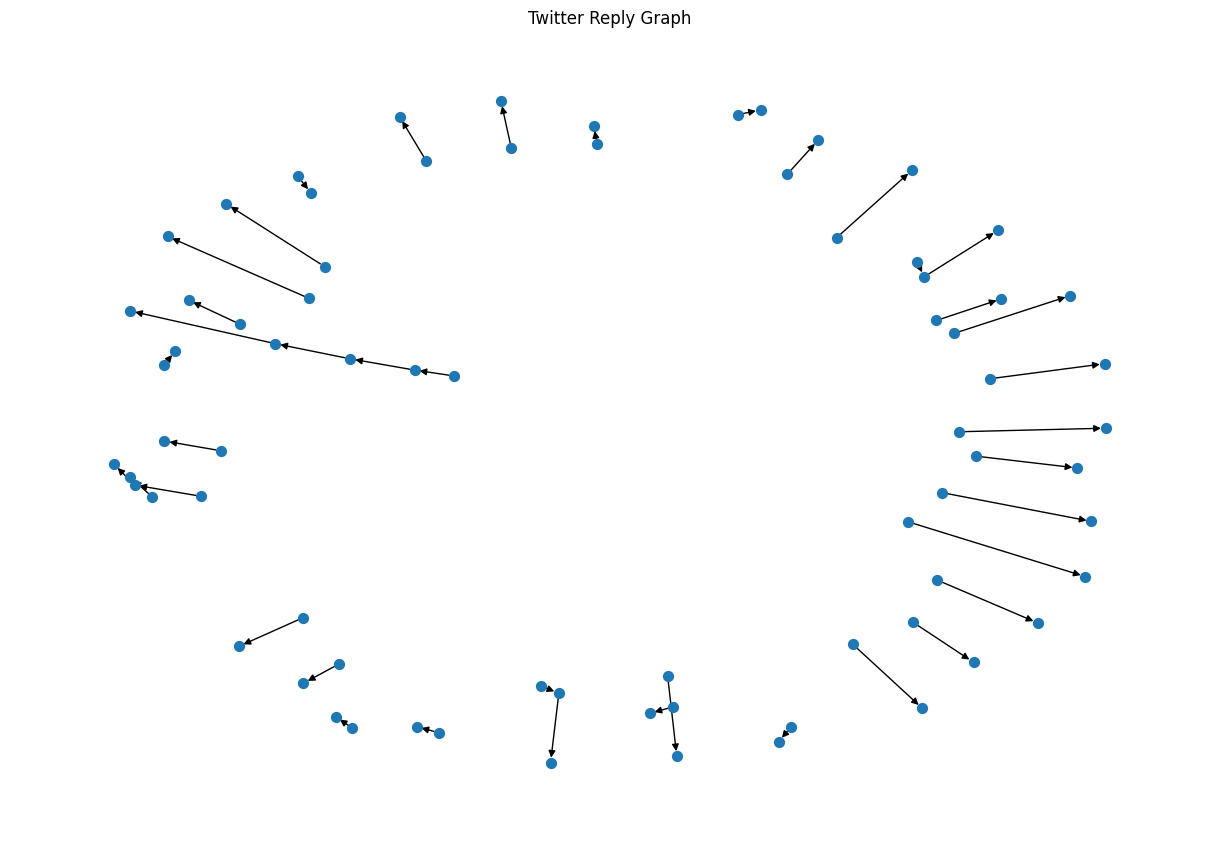

In [198]:

# Visualize the graph with a layout that emphasizes retweets, with respect to the color of the nodes
pos = nx.spring_layout(G, seed=213)
plt.figure(figsize=(12, 8))
# draw graph with nodes colored by color attribute
nx.draw(G, pos, node_size=50, font_size=8, with_labels=False, arrows=True)


# nx.draw(G, pos, node_size=50, font_size=8, with_labels=False, arrows=True)
plt.title("Twitter Reply Graph")
plt.axis('off')
plt.show()


In [101]:
tweets_df.retweeted = tweets_df.retweeted.fillna(True)

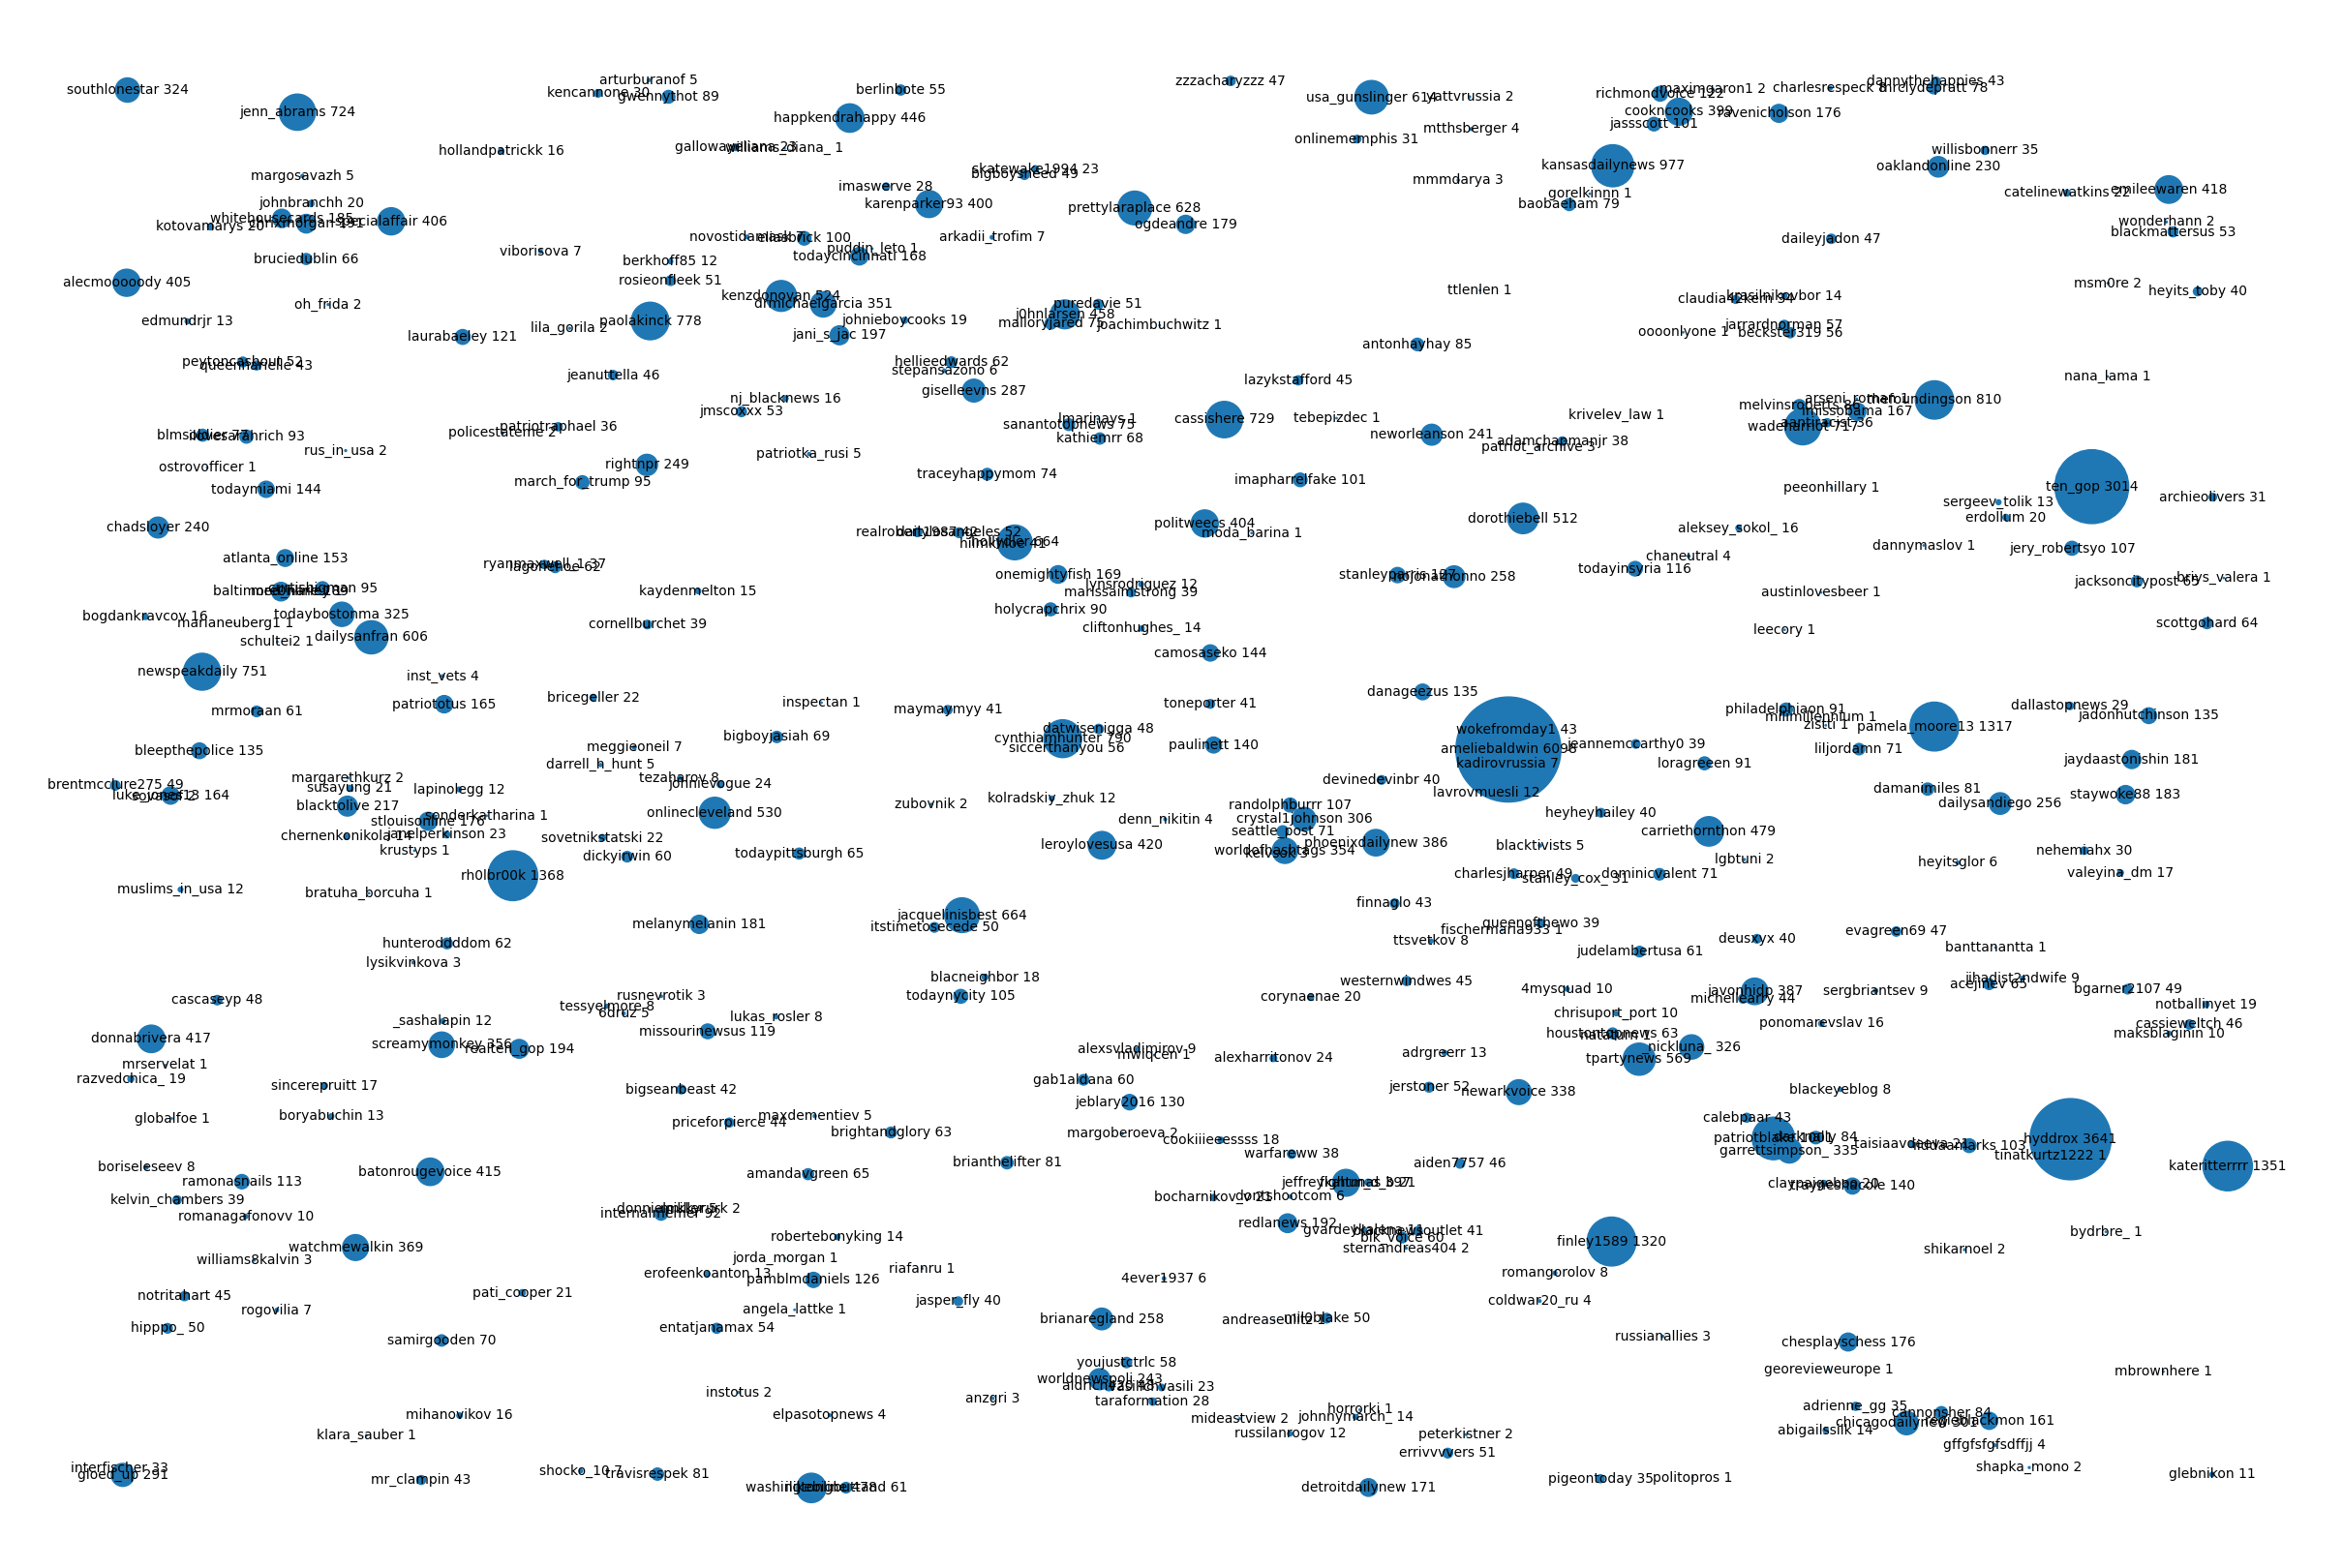

In [184]:
G = nx.Graph()
for idx, row in tweets_df[tweets_df.retweeted == False].groupby('user_key').count()[['user_id']].iterrows():
    G.add_node(idx + ' ' + str(row['user_id']), count=row['user_id'])

# use count as radius of node
node_sizes = [G.nodes[node]['count']  for node in G]

fig = plt.figure(figsize=(24, 16))
pos = nx.random_layout(G)
# draw graph with 'count' as a label for each node
nx.draw(G, pos, node_size=node_sizes, font_size=10, with_labels=True, arrows=False)

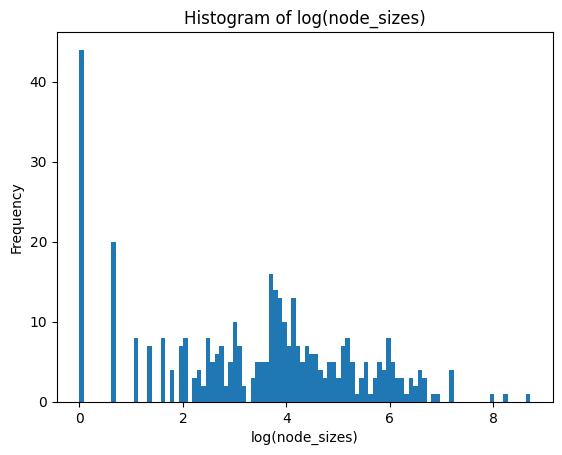

In [189]:
import numpy as np
plt.hist(np.log(node_sizes), bins=100)
plt.title('Histogram of log(node_sizes)')
plt.xlabel('log(node_sizes)')
plt.ylabel('Frequency')
plt.show()

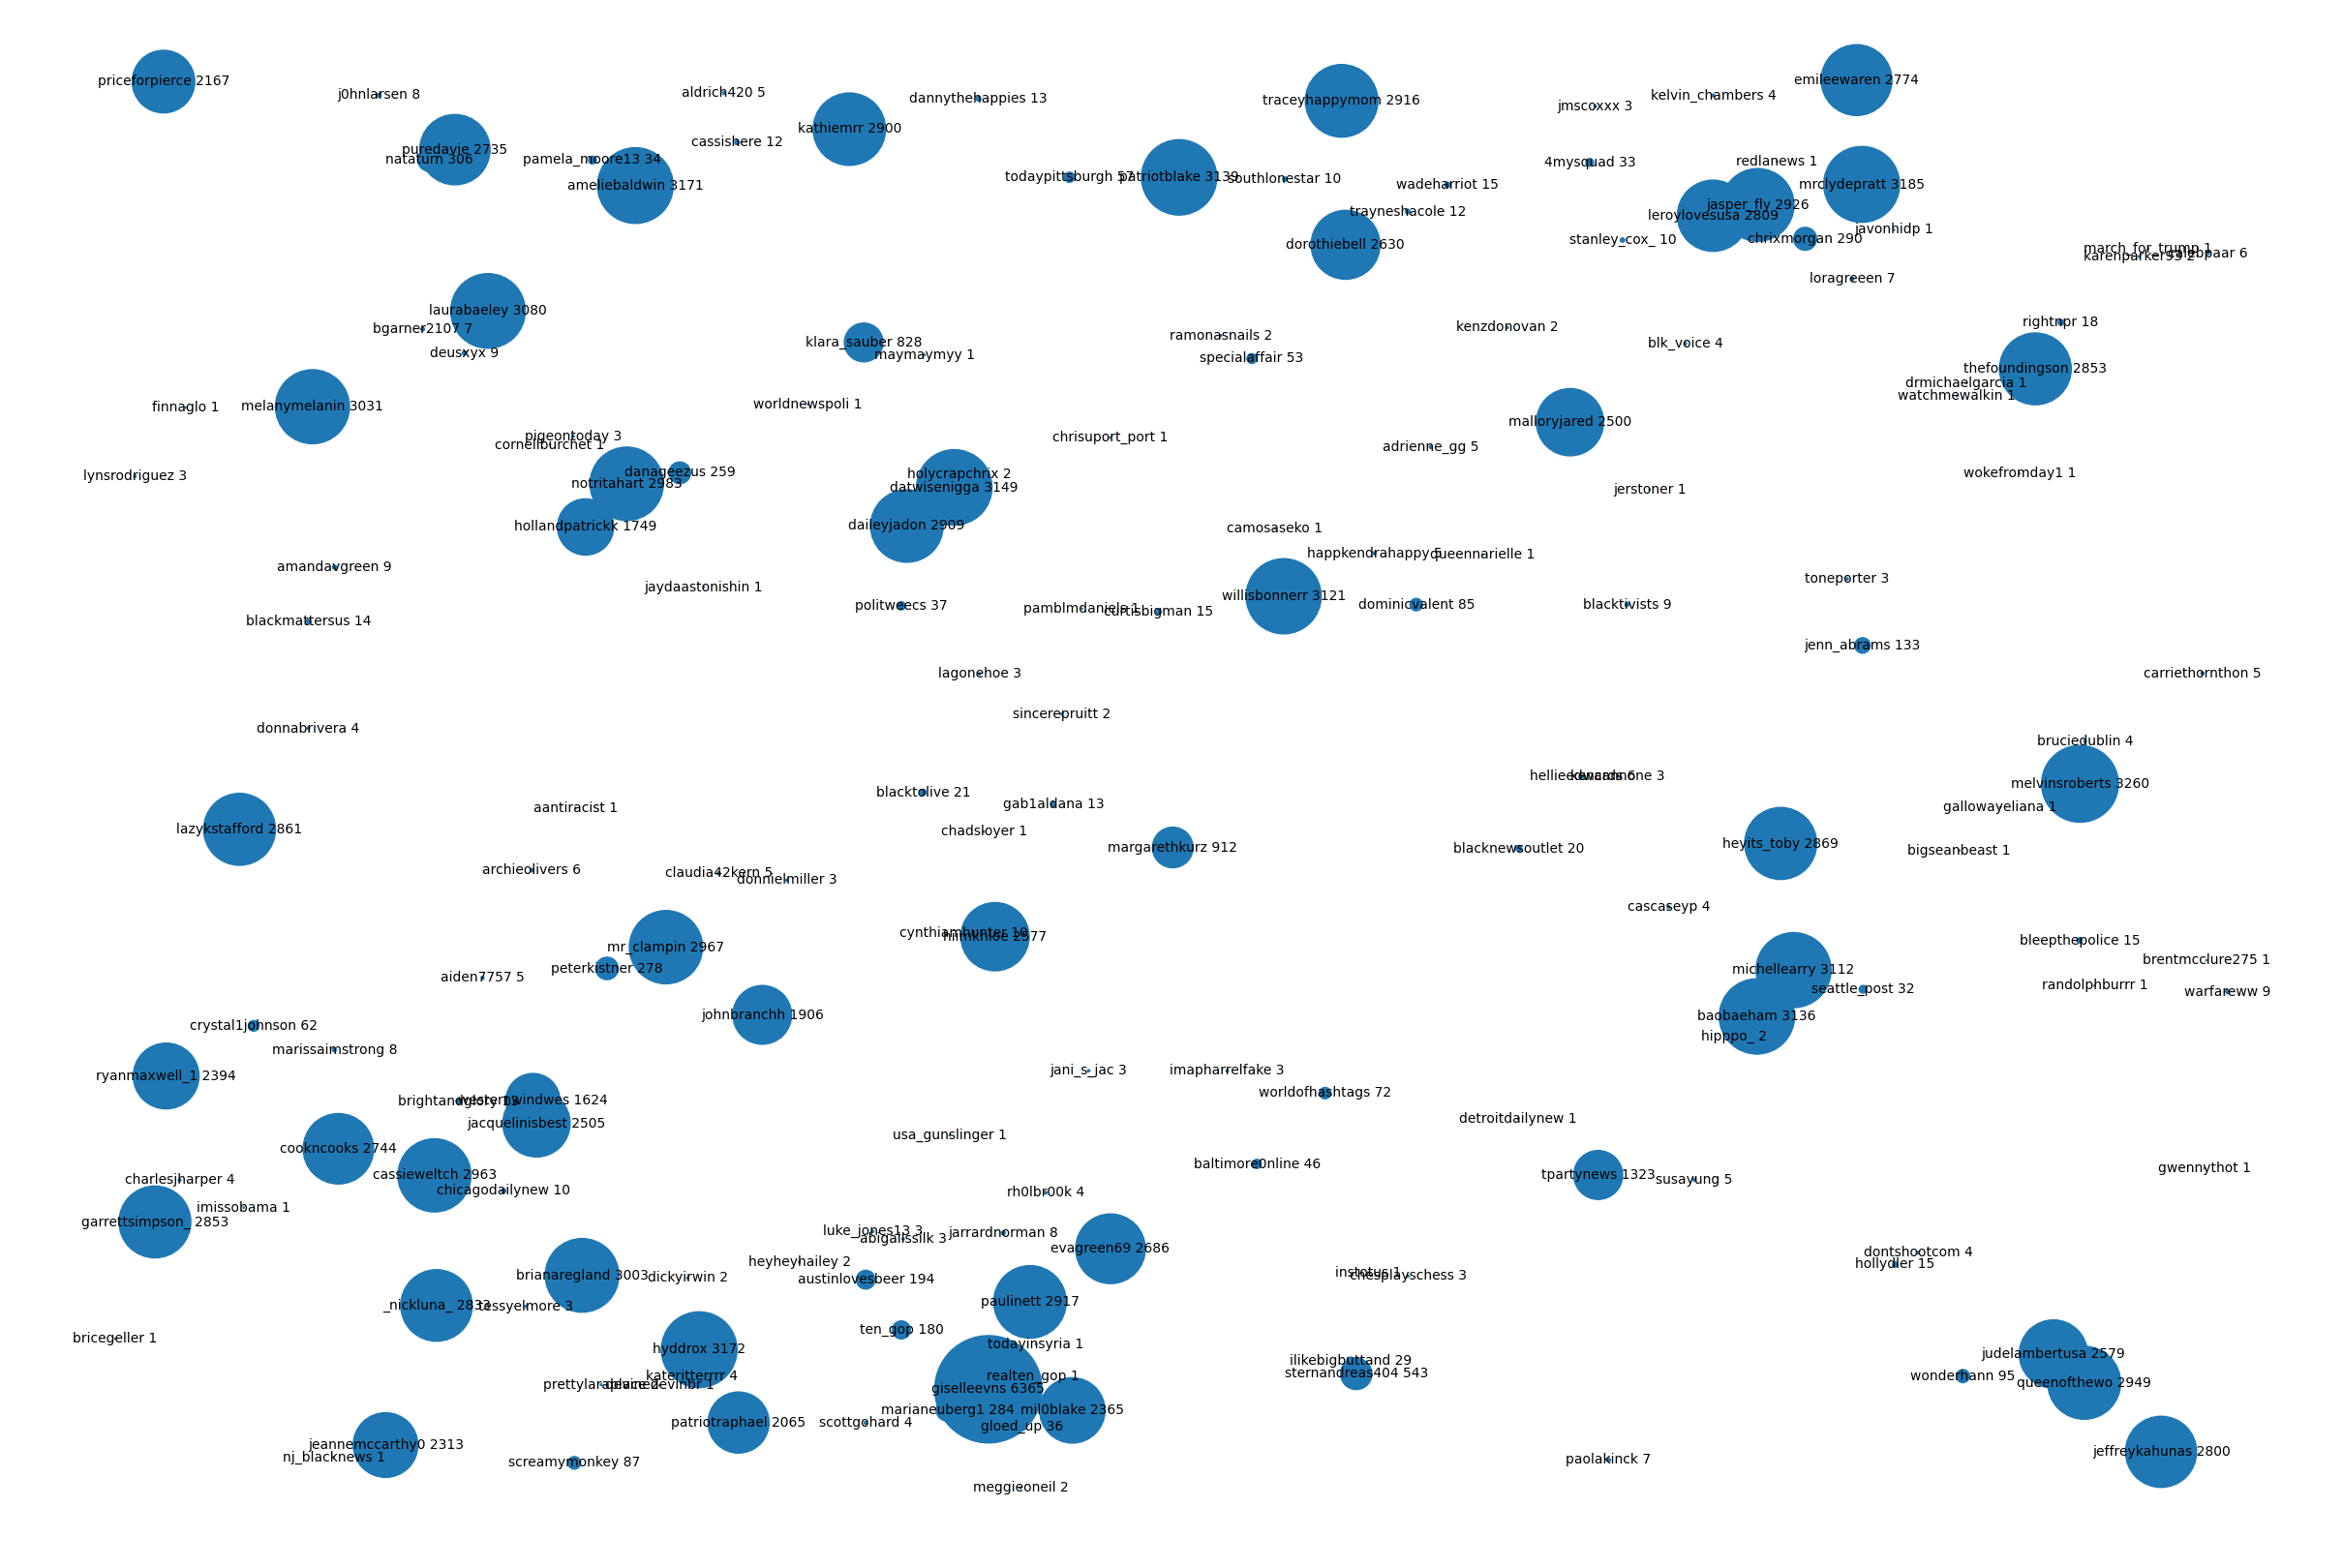

In [190]:
G = nx.Graph()
for idx, row in tweets_df[tweets_df.retweeted == True].groupby('user_key').count()[['user_id']].iterrows():
    G.add_node(idx + ' ' + str(row['user_id']), count=row['user_id'])

# use count as radius of node
node_sizes = [G.nodes[node]['count']  for node in G]

fig = plt.figure(figsize=(24, 16))
pos = nx.random_layout(G)
# draw graph with 'count' as a label for each node
nx.draw(G, pos, node_size=node_sizes, font_size=10, with_labels=True, arrows=False)

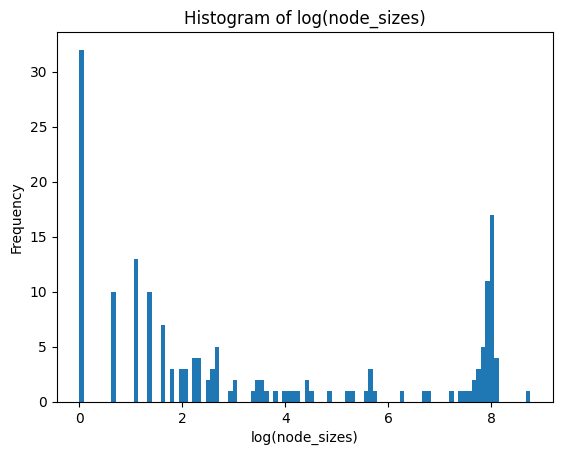

In [194]:
plt.hist(np.log(node_sizes), bins=100)
plt.title('Histogram of log(node_sizes)')
plt.xlabel('log(node_sizes)')
plt.ylabel('Frequency')
plt.show()

In [281]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms import community

tweets_df = pd.read_csv("tweets.csv")
users_df = pd.read_csv("users.csv")

# Tworzenie grafu NetworkX
G = nx.Graph()

# Wczytanie danych z DataFrame `tweets_df` i `users_df`
# Zakładam, że w danych znajduje się informacja o retweetach, na przykład user_id i retweeted_status_id
for index, row in tweets_df.iterrows():
    user_id = row['user_id']
    retweeted_status_id = row['retweeted_status_id']
    
    # Dodaj wierzchołki użytkowników i krawędzie reprezentujące retweety
    if pd.notnull(retweeted_status_id):
        G.add_node(user_id)
        G.add_node(retweeted_status_id)
        G.add_edge(user_id, retweeted_status_id)

# Algorytm Louvaina do wykrywania społeczności
communities = list(community.label_propagation_communities(G))

In [282]:
new_comm = [com for com in communities if len(com) > 1000]

In [284]:
it = list(G.nodes())
for g in it:
    assigned = False
    for i, c in enumerate(new_comm):
        if g in c:
            G.nodes[g]['community'] = i
            assigned = True
    if not assigned:
        G.remove_node(g)


In [285]:
G.nodes[2606301939.0]

{'community': 0}

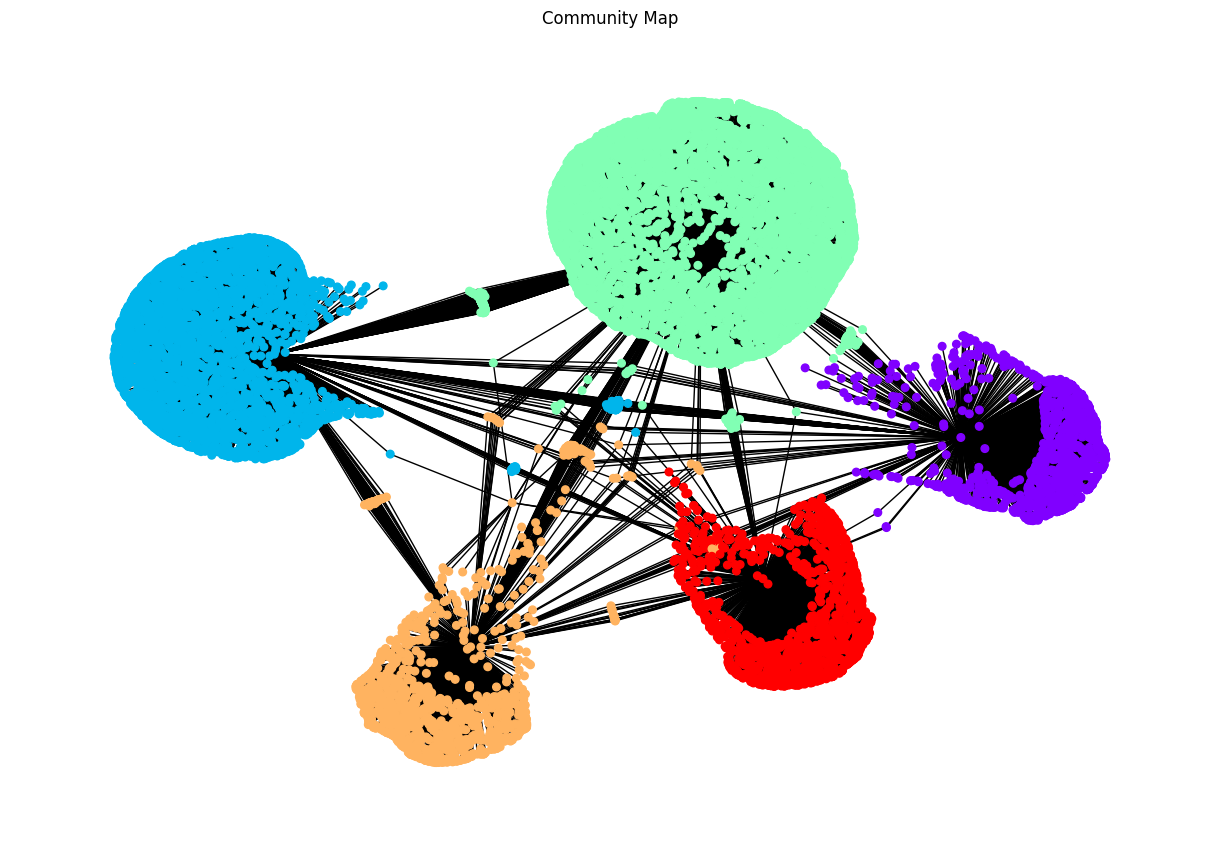

In [286]:
# draw graph, use color from 'community' attribute
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, iterations=15)
colors = [G.nodes[node]['community'] for node in G.nodes]
# map colors to colormap
nx.draw(G, pos, node_color=colors, cmap=plt.cm.rainbow, with_labels=False, node_size=30)
plt.title('Community Map')
plt.show()

In [362]:
all_hashes = []
for com in new_comm:
    temp_df = tweets_df[tweets_df.user_id.isin(com)]
    temp_df.hashtags = temp_df.hashtags.str.replace('[', '').str.replace(']', '').str.replace("'", '').str.replace('''"''', '')
    hashes = temp_df.hashtags.apply(lambda x: x.split(',')).sum()
    ser = pd.Series(index=np.unique(hashes))
    for h in ser.index:
        ser[h] = hashes.count(h)
    ser = ser.sort_values(ascending=False)
    print(ser.head())

C:\Users\mikol\AppData\Local\Temp\ipykernel_1284\3855771930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.hashtags = temp_df.hashtags.str.replace('[', '').str.replace(']', '').str.replace("'", '').str.replace('''"''', '')
C:\Users\mikol\AppData\Local\Temp\ipykernel_1284\3855771930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.hashtags = temp_df.hashtags.str.replace('[', '').str.replace(']', '').str.replace("'", '').str.replace('''"''', '')


         766.0
maga     126.0
tcot     121.0
Trump     97.0
pjnet     76.0
dtype: float64
                4802.0
maga             364.0
Trump            281.0
tcot             213.0
NeverHillary     183.0
dtype: float64


C:\Users\mikol\AppData\Local\Temp\ipykernel_1284\3855771930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.hashtags = temp_df.hashtags.str.replace('[', '').str.replace(']', '').str.replace("'", '').str.replace('''"''', '')


                6108.0
maga             605.0
Trump            322.0
NeverHillary     280.0
Trump2016        206.0
dtype: float64
         824.0
maga     142.0
pjnet    108.0
tcot     107.0
Trump     79.0
dtype: float64
         811.0
maga     114.0
tcot     100.0
pjnet     82.0
Trump     73.0
dtype: float64


C:\Users\mikol\AppData\Local\Temp\ipykernel_1284\3855771930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.hashtags = temp_df.hashtags.str.replace('[', '').str.replace(']', '').str.replace("'", '').str.replace('''"''', '')
C:\Users\mikol\AppData\Local\Temp\ipykernel_1284\3855771930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.hashtags = temp_df.hashtags.str.replace('[', '').str.replace(']', '').str.replace("'", '').str.replace('''"''', '')


In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms import community

tweets_df = pd.read_csv("tweets.csv")
users_df = pd.read_csv("users.csv")


In [2]:
# BLM
d = tweets_df[(~tweets_df.text.isna()) & ((tweets_df.text.str.lower().str.contains('blacklivesmatter')) | (tweets_df.hashtags.str.lower().str.contains('blacklivesmatter')))].sort_values('created_str').reset_index(drop=True)
d['created_str'] = pd.to_datetime(d['created_str'])


In [ ]:
# ALL
# d = tweets_df[(~tweets_df.text.isna())].sort_values('created_str').reset_index(drop=True)
# d['created_str'] = pd.to_datetime(d['created_str'])


In [ ]:
# ______________________________________________________________________________________________________________________

# _____________________________ utworz folder grafn zanim to puscisz!!!

# ______________________________________________________________________________________________________________________

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
import matplotlib.colors as mcolors
import datetime as dt

DAYS = 7

G = nx.Graph()

node_positions = {}  # Słownik do przechowywania pozycji węzłów

idx0 = d.created_str.min()

df = d[(d.created_str >= idx0 + dt.timedelta(days=DAYS*0)) & (d.created_str < idx0 + dt.timedelta(days=DAYS*1))]
iteration = 0

frames = []

# Tworzenie rysunku przed pętlą
# niech figure ma zakres od 0 do 1 w obu kierunkach
fig = plt.figure(figsize=(12, 8))
# plt.xlim(0, 1)
# plt.ylim(0, 1)

while idx0 + dt.timedelta(days=DAYS*(iteration)) < d.created_str.max():
    iteration += 1
    # Iteruj po wierszach DataFrame, sprawdzając, czy created_str jest równy wybranej dacie
    for index, row in df.iterrows():
        target_date = row['created_str']
        tweet_id = row['tweet_id']
        retweeted_status_id = row['retweeted_status_id']

        # change color of node based on the date
        node_color = mcolors.to_hex(
            plt.cm.get_cmap('viridis')(iteration / 130))

        G.add_node(tweet_id, datetime=row['created_str'], color=node_color)

        # Ustal pozycję węzła na losową lub dowolną
        if tweet_id not in node_positions:
            node_positions[tweet_id] = (random.uniform(0, 1), random.uniform(0, 1))

        # Jeśli istnieje retweeted_status_id, dodaj krawędź
        if not pd.isna(retweeted_status_id) and retweeted_status_id in G.nodes():
            G.add_edge(tweet_id, retweeted_status_id)
    fig = plt.figure(figsize=(12, 8))

    # Rysuj aktualny stan grafu z datą, stałymi pozycjami węzłów i kolorem węzła
    # plt.figure(fig.number)  # Ustawić numer figury
    nx.draw(G, pos=node_positions, node_color=[G.nodes[n]['color'] for n in G.nodes()],
            with_labels=False, node_size=10, cmap='viridis')
    plt.title('Graf z datą: ' + str(idx0 + dt.timedelta(days=DAYS*(iteration+1))))


    plt.savefig('graf2/graph_' + str(iteration).zfill(3) + '.png')

    clear_output(wait=True)

    # Zapisz aktualny wykres do listy ramek
    frame = plt.gcf()
    frames.append(frame)

    plt.show()

    df = d[(d.created_str >= idx0 + dt.timedelta(days=DAYS*iteration)) & (d.created_str < idx0 + dt.timedelta(days=DAYS*(iteration+1))) ]


In [ ]:
# gif maker

import os
import imageio

# Ścieżka do folderu z plikami PNG
folder_path = 'graf2'

# Lista plików PNG w folderze
png_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.png')]

# Sortuj pliki PNG alfabetycznie
png_files.sort()

# Nazwa pliku GIF, do którego zostaną zapisane pliki PNG
output_gif = 'graf2.gif'

# Tworzenie pliku GIF z plików PNG
with imageio.get_writer(output_gif, mode='I', duration=0.5) as writer:
    for png_file in png_files:
        image = imageio.imread(png_file)
        writer.append_data(image)

print(f'Plik GIF został stworzony: {output_gif}')
